In [26]:
import csv

# 데이터 준비
data = [
    ["장애영역별", "특수학교", "일반학교 특수학급", "일반학교 일반학급(전일제 통합학급)", "특수교육 지원센터", "계"],
    ["시각장애", 1079, 207, 458, 1, 1745],
    ["청각장애", 560, 689, 1646, 12, 2907],
    ["지적장애", 14540, 35855, 5457, 15, 55867],
    ["지체장애", 3905, 3232, 2326, 59, 9522],
    ["정서·행동장애", 68, 1186, 577, 0, 1831],
    ["자폐성장애", 7781, 10183, 1307, 4, 19275],
    ["의사소통장애", 206, 1396, 1042, 1, 2645],
    ["학습장애", 10, 628, 399, 0, 1037],
    ["건강장애", 13, 109, 1834, 0, 1956],
    ["발달지체", 780, 8508, 3428, 202, 12918],
    ["계", 28942, 61993, 18474, 294, 109703]
]

# CSV 파일로 저장
filename = 'p.7.csv'
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"{filename} 파일이 성공적으로 저장되었습니다.")

p.7.csv 파일이 성공적으로 저장되었습니다.


In [27]:
import pandas as pd

df1 = pd.read_csv('p.7.csv', encoding = "utf-8")
df1.drop(df1.tail(1).index, inplace=True)
df1

,장애영역별,특수학교,일반학교 특수학급,일반학교 일반학급(전일제 통합학급),특수교육 지원센터,계
0,시각장애,1079,207,458,1,1745
1,청각장애,560,689,1646,12,2907
2,지적장애,14540,35855,5457,15,55867
3,지체장애,3905,3232,2326,59,9522
4,정서·행동장애,68,1186,577,0,1831
5,자폐성장애,7781,10183,1307,4,19275
6,의사소통장애,206,1396,1042,1,2645
7,학습장애,10,628,399,0,1037
8,건강장애,13,109,1834,0,1956
9,발달지체,780,8508,3428,202,12918


In [28]:
df_1 = df1.copy()
df_1.loc[10] = ['발달장애', df_1.loc[[2, 4, 5, 9], '특수학교'].sum(), df_1.loc[[2, 4, 5, 9], '일반학교 특수학급'].sum(), df_1.loc[[2, 4, 5, 9], '일반학교 일반학급(전일제 통합학급)'].sum(), df_1.loc[[2, 4, 5, 9], '특수교육 지원센터'].sum(), df_1.loc[[2, 4, 5, 9], '계'].sum()]

# 발달장애를 포함한 행 제거
df_1 = df_1.drop(index=[2, 4, 5, 9])
df_1

,장애영역별,특수학교,일반학교 특수학급,일반학교 일반학급(전일제 통합학급),특수교육 지원센터,계
0,시각장애,1079,207,458,1,1745
1,청각장애,560,689,1646,12,2907
3,지체장애,3905,3232,2326,59,9522
6,의사소통장애,206,1396,1042,1,2645
7,학습장애,10,628,399,0,1037
8,건강장애,13,109,1834,0,1956
10,발달장애,23169,55732,10769,221,89891


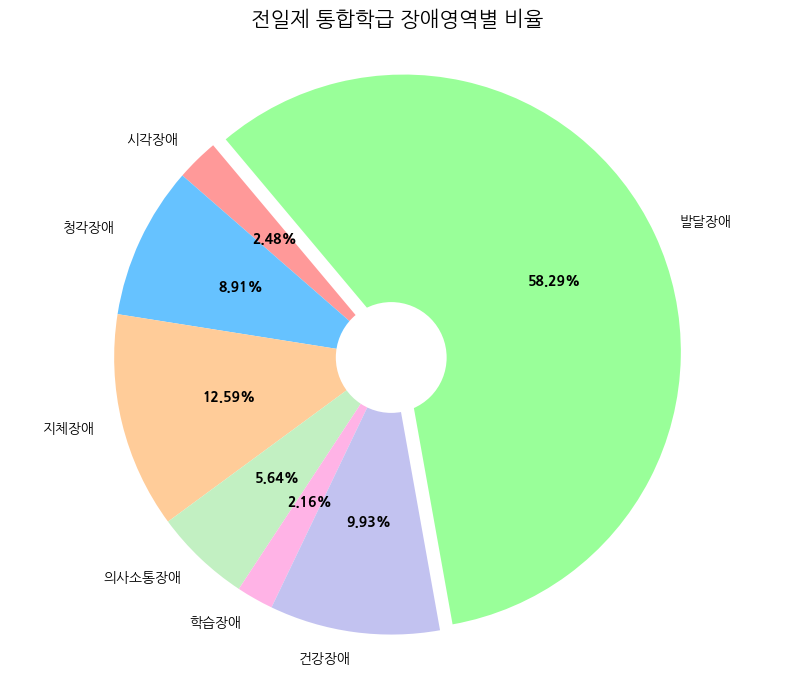

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 색상 설정 (파스텔 계열)
colors = ['#ff9999', '#66c2ff', '#ffcc99', '#c2f0c2', '#ffb3e6', '#c2c2f0', '#99ff99']
# , '#ffb3b3', '#ffccff'
explode = (0, 0, 0, 0, 0, 0, 0.05)

# 파이차트 그리기
plt.figure(figsize=(10, 8))

# autopct 함수 정의
# def my_autopct(pct):
#     total = sum(df1['일반학교 일반학급(전일제 통합학급)'])
#     val = int(round(pct*total/100.0))
#     return "{:.1f}%\n({:d}명)".format(pct, val)


wedges, texts, autotexts = plt.pie(df_1.loc[:, '일반학교 일반학급(전일제 통합학급)'], labels=df_1.loc[:, '장애영역별'], autopct="%1.2f%%", startangle=130, colors=colors, explode=explode)
#, shadow=True
plt.setp(autotexts, size=10, weight="bold")  # 퍼센트 텍스트 스타일 설정



# # 발달장애 부분에만 그림자 추가
# for i, wedge in enumerate(wedges):
#     if i == 6:  # 발달장애 부분 (index 6)
#         wedge.set_path_effects([path_effects.withStroke(linewidth=5, foreground="black", alpha=0.2)])  # 그림자 추가

# 중앙에 원 추가 (도넛 형태)
centre_circle = plt.Circle((0,0),0.2,fc='white')  # 중심 원
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('전일제 통합학급 장애영역별 비율', y=1.02, fontsize=15)
plt.axis('equal')  
plt.show()

In [31]:
df_2 = df1.copy()
df_2.loc[10] = ['발달장애 수반 장애', df_2.loc[[2, 4, 5, 6, 7, 9], '특수학교'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], '일반학교 특수학급'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], '일반학교 일반학급(전일제 통합학급)'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], '특수교육 지원센터'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], '계'].sum()]

# 발달장애를 포함한 행 제거
df_2 = df_2.drop(index=[2, 4, 5, 6, 7, 9])
df_2

,장애영역별,특수학교,일반학교 특수학급,일반학교 일반학급(전일제 통합학급),특수교육 지원센터,계
0,시각장애,1079,207,458,1,1745
1,청각장애,560,689,1646,12,2907
3,지체장애,3905,3232,2326,59,9522
8,건강장애,13,109,1834,0,1956
10,발달장애 수반 장애,23385,57756,12210,222,93573


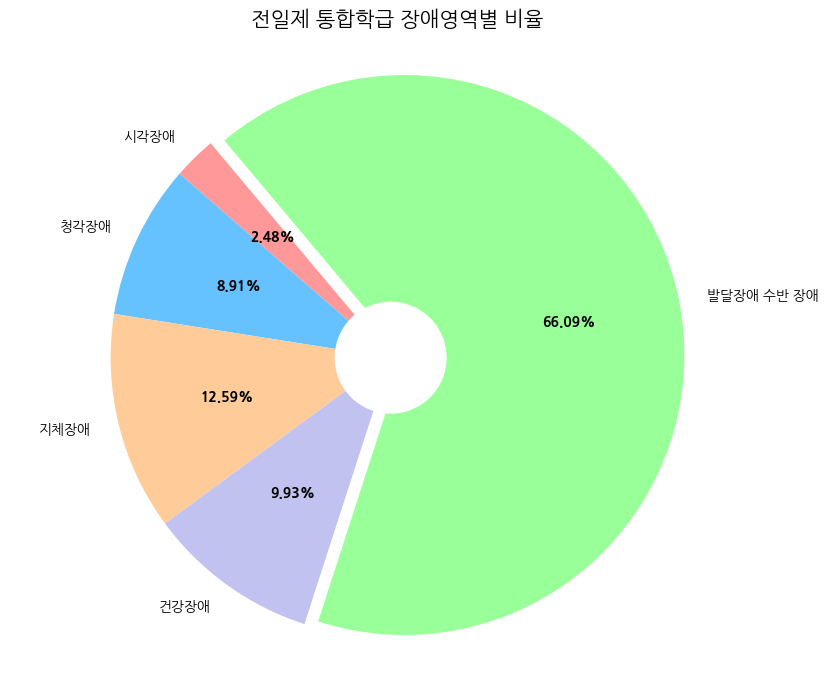

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 색상 설정 (파스텔 계열)
colors = ['#ff9999', '#66c2ff', '#ffcc99', '#c2c2f0', '#99ff99']
# , '#ffb3b3', '#ffccff'
explode = (0, 0, 0, 0, 0.05)

# 파이차트 그리기
plt.figure(figsize=(10, 8))

# autopct 함수 정의
# def my_autopct(pct):
#     total = sum(df1['일반학교 일반학급(전일제 통합학급)'])
#     val = int(round(pct*total/100.0))
#     return "{:.1f}%\n({:d}명)".format(pct, val)


wedges, texts, autotexts = plt.pie(df_2.loc[:, '일반학교 일반학급(전일제 통합학급)'], labels=df_2.loc[:, '장애영역별'], autopct="%1.2f%%", startangle=130, colors=colors, explode=explode)
#, shadow=True
plt.setp(autotexts, size=10, weight="bold")  # 퍼센트 텍스트 스타일 설정



# # 발달장애 부분에만 그림자 추가
# for i, wedge in enumerate(wedges):
#     if i == 6:  # 발달장애 부분 (index 6)
#         wedge.set_path_effects([path_effects.withStroke(linewidth=5, foreground="black", alpha=0.2)])  # 그림자 추가

# 중앙에 원 추가 (도넛 형태)
centre_circle = plt.Circle((0,0),0.2,fc='white')  # 중심 원
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('전일제 통합학급 장애영역별 비율', y=1.02, fontsize=15)
plt.axis('equal')  
plt.show()

In [33]:
import csv

# 데이터 준비
data = [
    ["연도", "시각장애", "청각장애", "지적장애", "지체장애", "정서·행동장애", "자폐성장애", "의사소통장애", "학습장애", "건강장애", "발달지체", "전체"],
    ["2019", "1,937 (2.1)", "3,225 (3.5)", "49,624 (53.4)", "10,200 (11.0)", "2,182 (2.3)", "13,105 (14.1)", "2,204 (2.4)", "1,409 (1.5)", "1,763 (1.9)", "7,309 (7.8)", "92,958 (100)"],
    ["2020", "1,908 (2.0)", "3,132 (3.3)", "50,693 (53.1)", "9,928 (10.4)", "1,993 (2.1)", "13,917 (14.6)", "2,404 (2.5)", "1,226 (1.3)", "1,785 (1.9)", "8,434 (8.8)", "95,420 (100)"],
    ["2021", "1,826 (1.9)", "3,026 (3.1)", "51,788 (52.8)", "9,695 (9.9)", "1,874 (1.9)", "15,215 (15.5)", "2,450 (2.5)", "1,114 (1.1)", "1,799 (1.8)", "9,367 (9.5)", "98,154 (100)"],
    ["2022", "1,753 (1.7)", "2,961 (2.9)", "53,718 (51.8)", "9,639 (9.3)", "1,865 (1.8)", "17,024 (16.4)", "2,622 (2.5)", "1,078 (1.0)", "1,948 (1.9)", "11,087 (10.7)", "103,695 (100)"],
    ["2023", "1,745 (1.6)", "2,907 (2.6)", "55,867 (50.9)", "9,522 (8.7)", "1,831 (1.7)", "19,275 (17.6)", "2,645 (2.4)", "1,037 (0.9)", "1,956 (1.8)", "12,918 (11.8)", "109,703 (100)"]
]

# CSV 파일로 저장
filename = 'p.8.csv'
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"{filename} 파일이 성공적으로 저장되었습니다.")

p.8.csv 파일이 성공적으로 저장되었습니다.


In [35]:
import pandas as pd

df2 = pd.read_csv('p.8.csv', encoding = "utf-8")
df2

,연도,시각장애,청각장애,지적장애,지체장애,정서·행동장애,자폐성장애,의사소통장애,학습장애,건강장애,발달지체,전체
0,2019,"1,937 (2.1)","3,225 (3.5)","49,624 (53.4)","10,200 (11.0)","2,182 (2.3)","13,105 (14.1)","2,204 (2.4)","1,409 (1.5)","1,763 (1.9)","7,309 (7.8)","92,958 (100)"
1,2020,"1,908 (2.0)","3,132 (3.3)","50,693 (53.1)","9,928 (10.4)","1,993 (2.1)","13,917 (14.6)","2,404 (2.5)","1,226 (1.3)","1,785 (1.9)","8,434 (8.8)","95,420 (100)"
2,2021,"1,826 (1.9)","3,026 (3.1)","51,788 (52.8)","9,695 (9.9)","1,874 (1.9)","15,215 (15.5)","2,450 (2.5)","1,114 (1.1)","1,799 (1.8)","9,367 (9.5)","98,154 (100)"
3,2022,"1,753 (1.7)","2,961 (2.9)","53,718 (51.8)","9,639 (9.3)","1,865 (1.8)","17,024 (16.4)","2,622 (2.5)","1,078 (1.0)","1,948 (1.9)","11,087 (10.7)","103,695 (100)"
4,2023,"1,745 (1.6)","2,907 (2.6)","55,867 (50.9)","9,522 (8.7)","1,831 (1.7)","19,275 (17.6)","2,645 (2.4)","1,037 (0.9)","1,956 (1.8)","12,918 (11.8)","109,703 (100)"


In [46]:
import re

df_3 = df2.copy()

def clean_and_convert(s):
    s = re.sub(r'\([^)]*\)', '', s)  # 괄호와 괄호 안의 내용 제거
    s = s.replace(',', '')  # 쉼표(,) 제거
    return int(s)

for col in df_3.columns[1:]:
    df_3[col] = df_3[col].apply(clean_and_convert)

df_3['발달장애'] = df_3['지적장애'] + df_3['정서·행동장애'] + df_3['자폐성장애'] + df_3['발달지체']
df_3 = df_3[['연도','발달장애','전체']]
df_3['비율'] = (df_3['발달장애'] / df_3['전체'] * 100).round(2)
df_3 = df_3[['연도','발달장애','비율']]
df_3

,연도,발달장애,비율
0,2019,72220,77.69
1,2020,75037,78.64
2,2021,78244,79.72
3,2022,83694,80.71
4,2023,89891,81.94


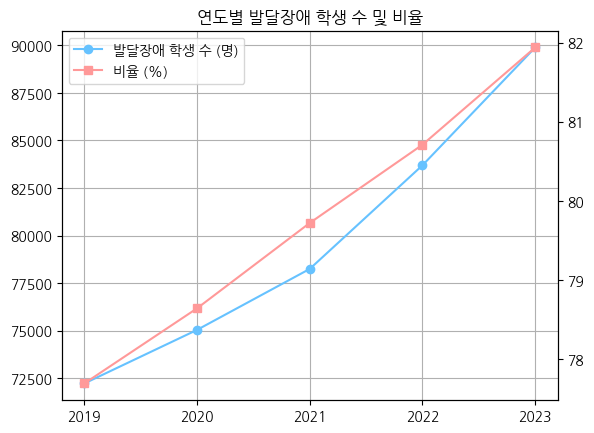

In [69]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# 왼쪽 y 축 (발달장애)
line1, = ax1.plot(df_3['연도'], df_3['발달장애'], color='#66c2ff', marker='o', label='발달장애 학생 수 (명)')
# ax1.set_ylabel('발달장애 학생 수', color='b')

# 오른쪽 y 축 (비율)
ax2 = ax1.twinx()
line2, = ax2.plot(df_3['연도'], df_3['비율'], color='#ff9999', marker='s', label='비율 (%)')
# ax2.set_ylabel('비율 (%)', color='r')

# 범례 추가
lines = [line1, line2]
plt.legend(lines, [line.get_label() for line in lines])

# xticks 설정
ax1.set_xticks(df_3['연도'])

ax1.grid(True)


plt.title('연도별 발달장애 학생 수 및 비율')

# # 각 데이터 포인트에 값 표시
# for i, txt in enumerate(df_3['발달장애']):
#     ax1.annotate(txt, (df_3['연도'][i], df_3['발달장애'][i]), textcoords="offset points", xytext=(35,-10), ha='center')

# for i, txt in enumerate(df_3['비율']):
#     ax2.annotate(txt, (df_3['연도'][i], df_3['비율'][i]), textcoords="offset points", xytext=(0,15), ha='center')

plt.show()


In [70]:
import csv

# 데이터 준비
data = [
    ["시도", "특수학교 학교 수", "특수학교 학급 수", "특수학교 학생 수", "특수학교 교원 수", "특수학교 일반직", "특수학급 학교 수", "특수학급 학급 수", "특수학급 학생 수", "특수학급 교사 수", "일반학급 학교 수", "일반학급 학급 수", "일반학급 학생 수", "특수교육지원센터 장애 영아", "특수교육지원센터 교사(정규)", "학생 계"],
    ["계", 194, 5443, 28942, 10146, 1813, 9288, 13287, 61993, 13888, 8366, 17497, 18474, 294, 1565, 109703],
    ["서울", 32, 856, 4483, 1547, 365, 936, 1588, 7167, 1658, 1010, 2151, 2195, 43, 101, 13888],
    ["부산", 15, 371, 2022, 690, 130, 524, 640, 3297, 652, 649, 1701, 1816, 0, 54, 7135],
    ["대구", 11, 334, 1908, 678, 80, 339, 469, 2205, 486, 509, 1311, 1399, 6, 87, 5518],
    ["인천", 10, 352, 1946, 588, 55, 509, 793, 4096, 818, 550, 1474, 1589, 17, 102, 7648],
    ["광주", 5, 228, 1170, 425, 32, 244, 322, 1582, 336, 258, 600, 634, 0, 44, 3386],
    ["대전", 6, 196, 1122, 368, 53, 282, 390, 1922, 414, 240, 487, 491, 6, 55, 3541],
    ["울산", 4, 151, 775, 254, 41, 226, 341, 1621, 346, 222, 491, 510, 4, 39, 2910],
    ["세종", 2, 48, 229, 79, 14, 128, 153, 659, 153, 71, 129, 137, 0, 16, 1025],
    ["경기", 38, 953, 5419, 2080, 370, 2354, 3628, 17535, 3998, 1804, 3742, 3930, 79, 357, 26963],
    ["강원", 9, 199, 866, 320, 73, 370, 407, 1789, 407, 288, 460, 476, 3, 55, 3134],
    ["충북", 11, 289, 1384, 496, 87, 428, 579, 2584, 584, 306, 677, 712, 10, 100, 4690],
    ["충남", 10, 279, 1342, 494, 79, 551, 818, 3716, 830, 336, 491, 523, 2, 89, 5583],
    ["전북", 10, 216, 1119, 388, 79, 412, 505, 2220, 509, 471, 859, 934, 0, 86, 4273],
    ["전남", 9, 220, 1197, 424, 106, 565, 728, 2832, 731, 226, 290, 307, 0, 72, 4336],
    ["경북", 8, 254, 1501, 456, 131, 579, 727, 3159, 741, 644, 1103, 1188, 30, 130, 5878],
    ["경남", 11, 392, 1914, 676, 92, 726, 1034, 4604, 1035, 613, 1133, 1209, 7, 143, 7734],
    ["제주", 3, 105, 545, 183, 26, 115, 165, 1005, 190, 169, 398, 424, 87, 35, 2061]
]

# CSV 파일로 저장
filename = 'p.13.csv'
with open(filename, 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"{filename} 파일이 성공적으로 저장되었습니다.")

p.13.csv 파일이 성공적으로 저장되었습니다.


In [78]:
import pandas as pd

df3 = pd.read_csv('p.13.csv', encoding = "utf-8")
df3 = df3[['시도','특수학교 학생 수', '특수학교 교원 수', '특수학급 학생 수', '특수학급 교사 수']]
df3['시도별 특수학교 교원 대비 학생 수'] = (df3['특수학교 학생 수'] / df3['특수학교 교원 수']).round(2)
df3['시도별 특수학급 교사 대비 학생 수'] = (df3['특수학급 학생 수'] / df3['특수학급 교사 수']).round(2)
df3 = df3[['시도','시도별 특수학교 교원 대비 학생 수','시도별 특수학급 교사 대비 학생 수']]
df3

,시도,시도별 특수학교 교원 대비 학생 수,시도별 특수학급 교사 대비 학생 수
0,계,2.85,4.46
1,서울,2.90,4.32
2,부산,2.93,5.06
3,대구,2.81,4.54
4,인천,3.31,5.01
5,광주,2.75,4.71
6,대전,3.05,4.64
7,울산,3.05,4.68
8,세종,2.90,4.31
9,경기,2.61,4.39


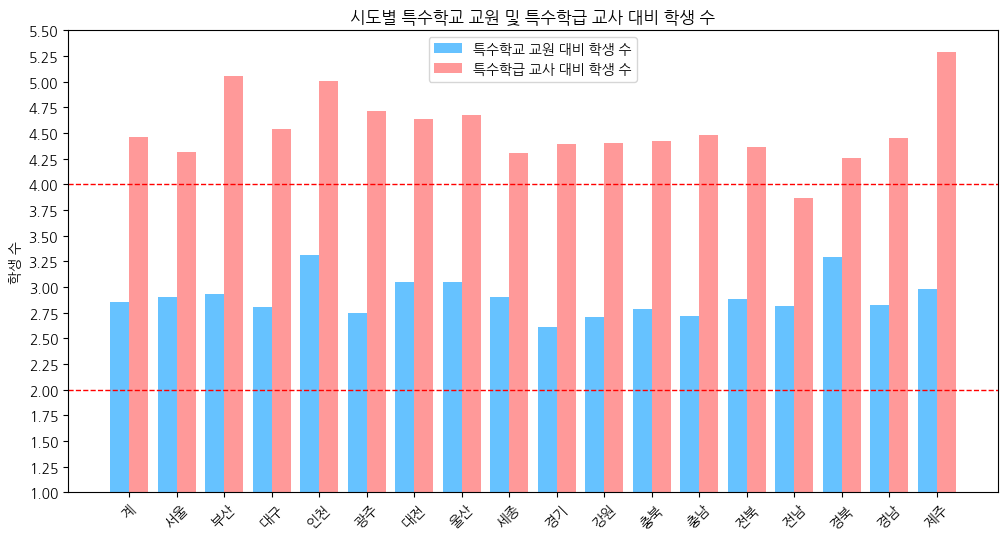

In [90]:
import numpy as np

# 막대그래프를 그리기 위한 위치 설정
x = np.arange(len(df3['시도']))

# 막대그래프 그리기
width = 0.4  # 막대의 너비 설정

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, df3['시도별 특수학교 교원 대비 학생 수'], width, label='특수학교 교원 대비 학생 수', color='#66c2ff')
bars2 = ax.bar(x + width/2, df3['시도별 특수학급 교사 대비 학생 수'], width, label='특수학급 교사 대비 학생 수', color='#ff9999')

# x 축 설정
ax.set_xticks(x)
ax.set_xticklabels(df3['시도'])
ax.legend()

ax.set_ylim(1, 5.5)
y_ticks = np.arange(1, 5.75, 0.25)  # 2부터 6까지 0.25 단위로 눈금 설정
ax.set_yticks(y_ticks)

# 라벨과 타이틀 설정
ax.set_ylabel('학생 수')
ax.set_title('시도별 특수학교 교원 및 특수학급 교사 대비 학생 수')

# 2와 4에 빨간 점선 추가
ax.axhline(y=2, color='r', linestyle='--', linewidth=1)
ax.axhline(y=4, color='r', linestyle='--', linewidth=1)

plt.xticks(rotation=45)  # x 축 라벨 회전

plt.show()

In [92]:
data = [
    ["연도", "특수학교 학생 수", "특수학급 학생 수", "특수학교 교원 수", "특수학급 교원 수"],
    ["2019", 26084, 50812, 8746, 11477],
    ["2020", 26299, 52744, 9161, 12079],
    ["2021", 27027, 54266, 9501, 12718],
    ["2022", 27979, 57948, 9866, 13632],
    ["2023", 28942, 61993, 10146, 13888],
]


In [95]:
df4 = pd.DataFrame(data[1:], columns=data[0])

# 새로운 열 추가
df4['특수학교 교원 대비 학생 수'] = (df4['특수학교 학생 수'] / df4['특수학교 교원 수']).round(2)
df4['특수학급 교사 대비 학생 수'] = (df4['특수학급 학생 수'] / df4['특수학급 교원 수']).round(2)
df4 = df4[['연도','특수학교 교원 대비 학생 수', '특수학급 교사 대비 학생 수']]

# 결과 출력
df4

,연도,특수학교 교원 대비 학생 수,특수학급 교사 대비 학생 수
0,2019,2.98,4.43
1,2020,2.87,4.37
2,2021,2.84,4.27
3,2022,2.84,4.25
4,2023,2.85,4.46


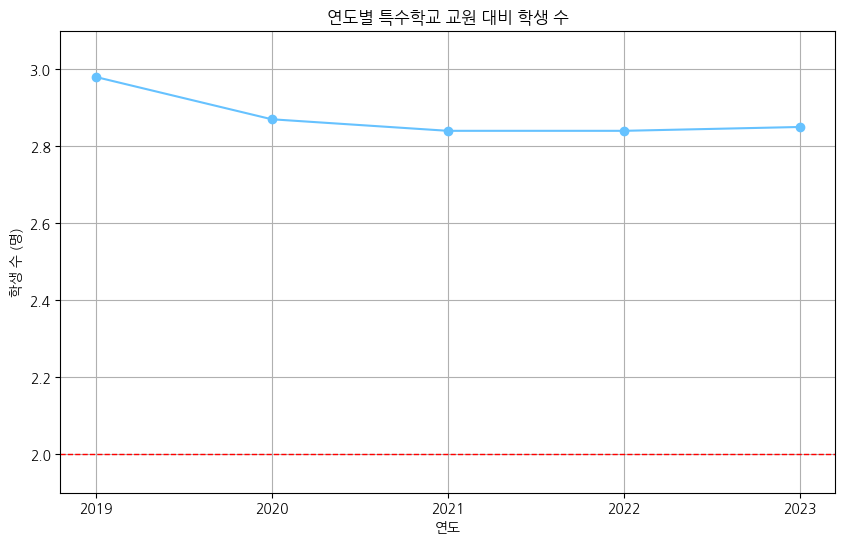

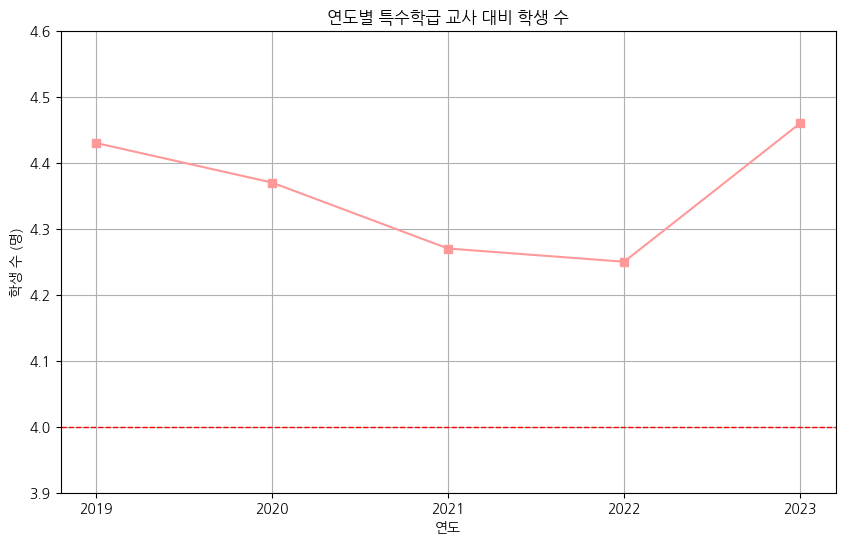

In [111]:
import matplotlib.pyplot as plt

# 데이터
years = df4['연도']
special_school_ratio = df4['특수학교 교원 대비 학생 수']
special_class_ratio = df4['특수학급 교사 대비 학생 수']

# 특수학교 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(years, special_school_ratio, marker='o', color='#66c2ff')
plt.xlabel('연도')
plt.ylabel('학생 수 (명)')
plt.title('연도별 특수학교 교원 대비 학생 수')
plt.xticks(years)
plt.ylim(1.9, 3.1)  # y 축 범위 설정
plt.grid(True)
plt.axhline(y=2, color='r', linestyle='--', linewidth=1)
plt.show()

# 특수학급 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(years, special_class_ratio, marker='s', color='#ff9999')
plt.xlabel('연도')
plt.ylabel('학생 수 (명)')
plt.title('연도별 특수학급 교사 대비 학생 수')
plt.xticks(years)
plt.ylim(3.9, 4.6)  # y 축 범위 설정
plt.grid(True)
plt.axhline(y=4, color='r', linestyle='--', linewidth=1)
plt.show()


In [ ]:
정리하자면!

1. 전체적으로 폰트와 디자인을 통일할 필요가 있다.
# 감성분석
# 통합교육에 있어서 발달장애 학생은 매우 높은 비중을 차지한다.
# 그러나 통합교육에 대한 긍정적인 뉴스이었음에도 불구하고 부정적인 댓글의 비율이 높았다. 
# 이를 바탕으로 장애 학생들의 개별화 교육에 대한 추가적인 방안 마련의 필요성을 느꼈다.
# 부정적인 댓글 중에 '아직 학생별로 지원이 부족', '학생 일인당 특수교사가 부족' 이런 맥락의 댓글들 가지고 온다.
# 개별화 교육 지원이 추가적으로 이루어지면 부정적인 인식이 줄어들 것을 기대하는 바이다.
2. 감성분석 부정적인 댓글 일부를 첨부할 필요가 있다.

# p.7
3. 일반학급 특수교육 대상자의 발달장애 학생 비율이 높았다.(일반학급의 발달장애&나머지 파이차트)
4. 나아가 특수교육 대상자 중 발달장애 학생들의 메인 타겟으로 제공할 수 있는 서비스를 기획했다. (메인 타켓층은 발달장애 학습자로 확정)(전체 발달장애&나머지 파이차트)
5. 발달장애 학습자 외에도 다른 장애 학생들(의사소통, 학습) 이 사용할 수 있을 것으로 기대한다(발달장애 동반 장애&나머지 파이차트)

# p.8
6. 메인 타겟이 확정되고 발달장애 전체 특수교육대상자가 늘고 있는 시각화(꺾은선 그래프)

# p.13, 15
# 특수학급과 특수학교를 봤더니 19년부터 한 번도 4 밑으로 내려 간 적이 없었다.
7. 19년부터 변화하는 특수학급 교사 당 학생 수, 특수학교 교사 당 학생수(꺾은선 그래프)
# 시도별로 봤더니 4를 조금 초과하는 걸 넘어서 일부 시도에서는 5도 넘더라, 따라서 이 서비스가 더욱 필요하고 생각한다.
8. 23년에서 살펴본 시도별 상하위 특수학급 교사 당 학생 수, 특수학교 교사 당 학생수(다중막대그래프 x축 시도, y축은 학생 수) 